<a href="https://colab.research.google.com/github/Youssef-Arouay/AlexNet-model-for-plant-classification-Accuracy-81-/blob/main/AlixNet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yudhaislamisulistya/plants-type-datasets")

print("Path to dataset files:", path)


# Path to the dataset version folder
version_path = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16"
print("Listing contents of the dataset version directory:")
print(os.listdir(version_path))


Path to dataset files: /root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16
Listing contents of the dataset version directory:
['split_ttv_dataset_type_of_plants']


In [ ]:
# Path to the split dataset directory
split_dir = os.path.join(version_path, "split_ttv_dataset_type_of_plants")

# List contents of the 'split_ttv_dataset_type_of_plants' directory
print("Listing contents of 'split_ttv_dataset_type_of_plants' directory:")
print(os.listdir(split_dir))
# Paths to the training, validation, and test sets
train_dir = os.path.join(split_dir, "Train_Set_Folder")
val_dir = os.path.join(split_dir, "Validation_Set_Folder")
test_dir = os.path.join(split_dir, "Test_Set_Folder")

# List contents of each directory
print("Listing contents of 'Train_Set_Folder':")
print(os.listdir(train_dir))

print("\nListing contents of 'Validation_Set_Folder':")
print(os.listdir(val_dir))

print("\nListing contents of 'Test_Set_Folder':")
print(os.listdir(test_dir))


Listing contents of 'split_ttv_dataset_type_of_plants' directory:
['Test_Set_Folder', 'Validation_Set_Folder', 'Train_Set_Folder']
Listing contents of 'Train_Set_Folder':
['ginger', 'shallot', 'peper chili', 'corn', 'pomelo', 'waterapple', 'mango', 'tobacco', 'melon', 'longbeans', 'galangal', 'soybeans', 'curcuma', 'sweet potatoes', 'pineapple', 'spinach', 'cassava', 'orange', 'bilimbi', 'kale', 'eggplant', 'guava', 'aloevera', 'coconut', 'watermelon', 'papaya', 'banana', 'cantaloupe', 'paddy', 'cucumber']

Listing contents of 'Validation_Set_Folder':
['ginger', 'shallot', 'peper chili', 'corn', 'pomelo', 'waterapple', 'mango', 'tobacco', 'melon', 'longbeans', 'galangal', 'soybeans', 'curcuma', 'sweet potatoes', 'pineapple', 'spinach', 'cassava', 'orange', 'bilimbi', 'kale', 'eggplant', 'guava', 'aloevera', 'coconut', 'watermelon', 'papaya', 'banana', 'cantaloupe', 'paddy', 'cucumber']

Listing contents of 'Test_Set_Folder':
['ginger', 'shallot', 'peper chili', 'corn', 'pomelo', 'water

In [ ]:
import os
import cv2
import numpy as np

# Function to load images and labels from a directory
def load_images_and_labels(base_dir):
    images, labels, categories = [], [], []
    category_dirs = os.listdir(base_dir)

    for idx, category in enumerate(category_dirs):
        category_path = os.path.join(base_dir, category)
        categories.append(category)

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load and resize the image
                img = cv2.imread(img_path)
                img = cv2.resize(img, (227, 227))  # Resize to fit AlexNet input
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), categories

# Define paths to the dataset
train_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Train_Set_Folder"
val_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Validation_Set_Folder"
test_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder"

# Load training, validation, and test data
train_images, train_labels, train_categories = load_images_and_labels(train_dir)
val_images, val_labels, _ = load_images_and_labels(val_dir)
test_images, test_labels, _ = load_images_and_labels(test_dir)

# Check the shape of the loaded data
print(f"Training images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (23972, 227, 227, 3)
Validation images shape: (3030, 227, 227, 3)
Test images shape: (2998, 227, 227, 3)


In [ ]:
from keras.utils import to_categorical
#Step 2: Preprocess the data

# Normalize images to range [0, 1]
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = len(train_categories)
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

print(f"Training labels shape: {train_labels.shape}")
print(f"Validation labels shape: {val_labels.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training labels shape: (23972, 30)
Validation labels shape: (3030, 30)
Test labels shape: (2998, 30)


In [ ]:
import os
import cv2
import numpy as np
from keras.optimizers import Adam  # Import Adam optimizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to load images and labels from a directory
def load_images_and_labels(base_dir):
    images, labels, categories = [], [], []
    category_dirs = os.listdir(base_dir)

    for idx, category in enumerate(category_dirs):
        category_path = os.path.join(base_dir, category)
        categories.append(category)

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load and resize the image
                img = cv2.imread(img_path)
                img = cv2.resize(img, (227, 227))  # Resize to fit AlexNet input
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels), categories

# Define paths to the dataset
train_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Train_Set_Folder"
val_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Validation_Set_Folder"
test_dir = "/root/.cache/kagglehub/datasets/yudhaislamisulistya/plants-type-datasets/versions/16/split_ttv_dataset_type_of_plants/Test_Set_Folder"

# Load training, validation, and test data
train_images, train_labels, train_categories = load_images_and_labels(train_dir)
val_images, val_labels, _ = load_images_and_labels(val_dir)
test_images, test_labels, _ = load_images_and_labels(test_dir)

# Normalize images to range [0, 1]
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = len(train_categories)
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
# Build the AlexNet model
def build_alexnet(input_shape, num_classes):
    model = Sequential()

    # Conv Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Conv Layer 2
    model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Conv Layer 3
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Conv Layer 4
    model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Conv Layer 5
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build the model
model = build_alexnet((227, 227, 3), num_classes)

# Compile the model with reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 384)      

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
750/750 [==============================] - 348s 461ms/step - loss: 2.6808 - accuracy: 0.1760 - val_loss: 2.0444 - val_accuracy: 0.3429
Epoch 2/10
750/750 [==============================] - 333s 444ms/step - loss: 1.9103 - accuracy: 0.3854 - val_loss: 1.6029 - val_accuracy: 0.4917
Epoch 3/10
750/750 [==============================] - 333s 444ms/step - loss: 1.4822 - accuracy: 0.5244 - val_loss: 1.3627 - val_accuracy: 0.5710
Epoch 4/10
750/750 [==============================] - 332s 443ms/step - loss: 1.1941 - accuracy: 0.6125 - val_loss: 1.0701 - val_accuracy: 0.6512
Epoch 5/10
750/750 [==============================] - 334s 445ms/step - loss: 0.9741 - accuracy: 0.6812 - val_loss: 0.9194 - val_accuracy: 0.6934
Epoch 6/10
750/750 [==============================] - 330s 440ms/step - loss: 0.7656 - accuracy: 0.7443 - val_loss: 0.7822 - val_accuracy: 0.7317
Epoch 7/10
750/750 [==============================] - 335s 446ms/step - loss: 0.6034 - accuracy: 0.8020 - val_loss: 0.8125 -

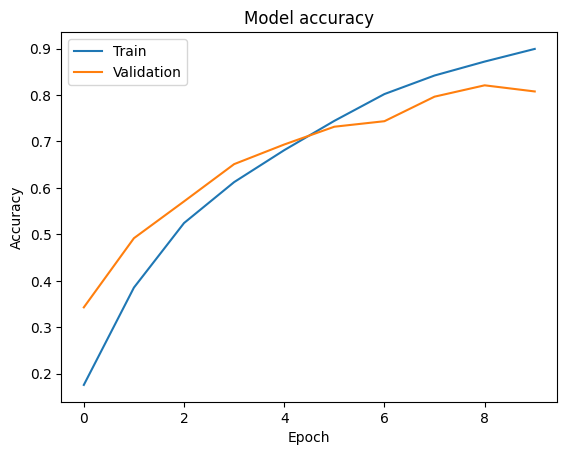

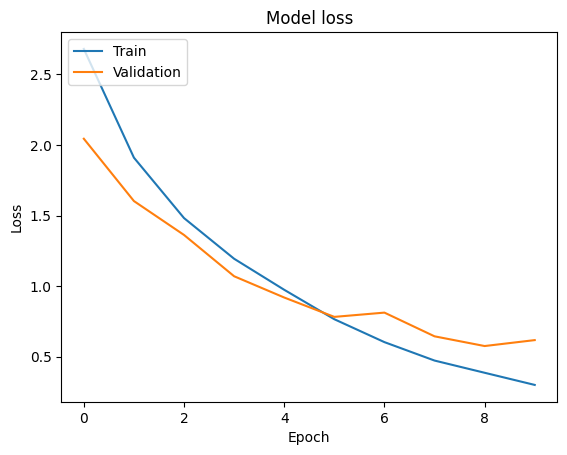

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Etape 6

94/94 [==============================] - 6s 58ms/step
Rapport de classification:
                precision    recall  f1-score   support

        ginger       0.70      0.86      0.77       100
       shallot       0.91      0.83      0.87       100
   peper chili       0.87      0.90      0.88       100
          corn       0.76      0.85      0.80       100
        pomelo       0.82      0.75      0.79       100
    waterapple       0.96      0.88      0.92       100
         mango       0.68      0.65      0.66       100
       tobacco       0.79      0.88      0.83       100
         melon       0.80      0.55      0.65       100
     longbeans       0.90      0.81      0.85       100
      galangal       0.75      0.84      0.79       100
      soybeans       0.83      0.91      0.87        99
       curcuma       0.89      0.76      0.82       100
sweet potatoes       0.90      0.84      0.87       100
     pineapple       0.77      0.86      0.81       100
       spinach       0

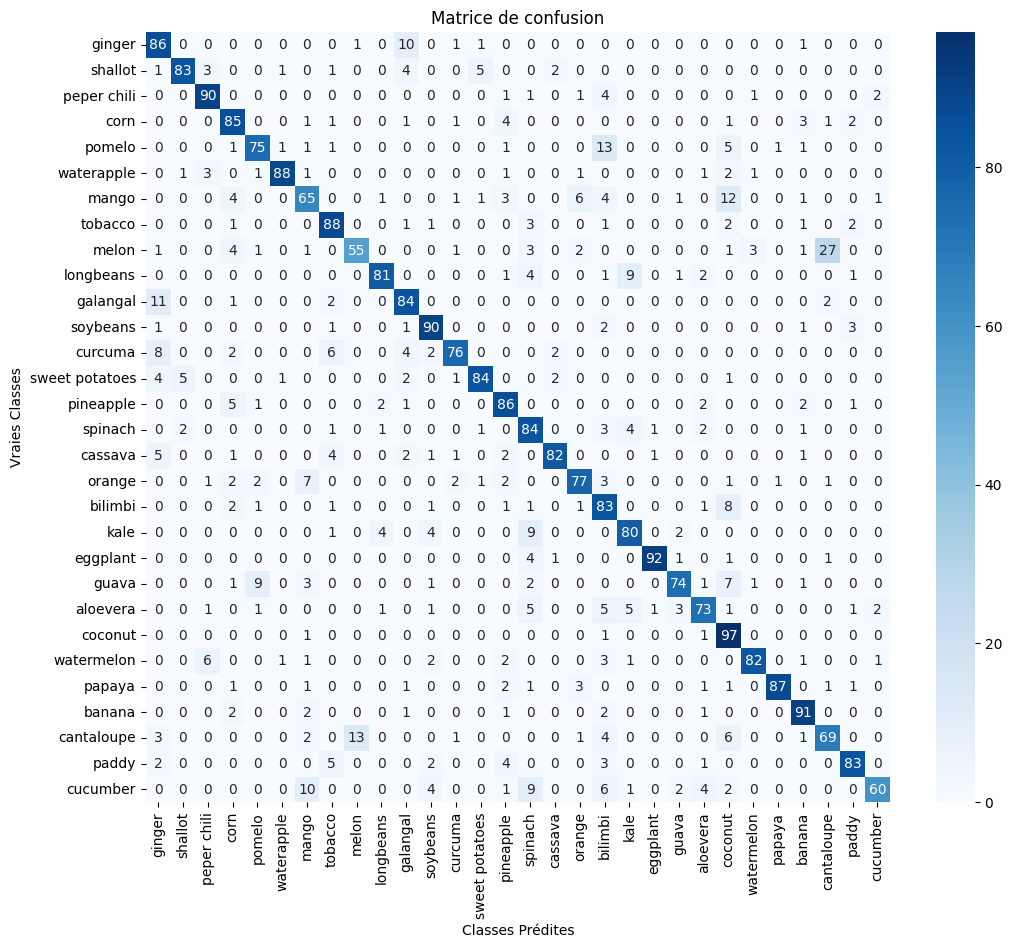

Nombre total de faux positifs: 532
Nombre total de faux négatifs: 554


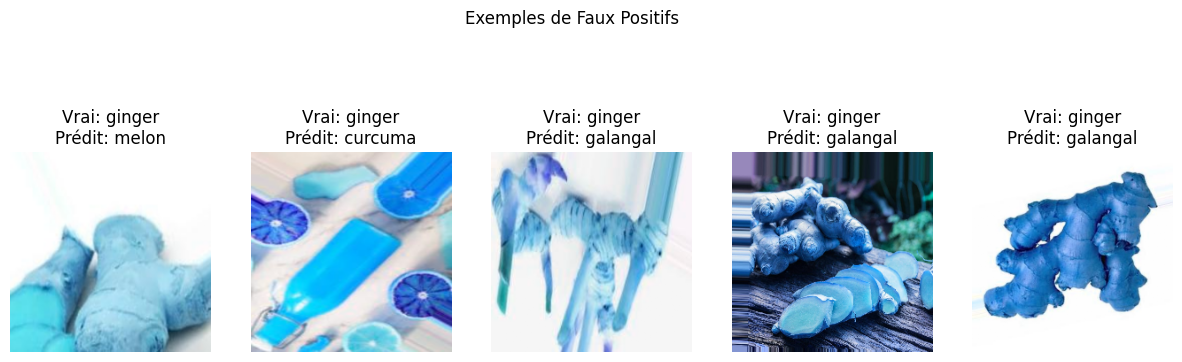

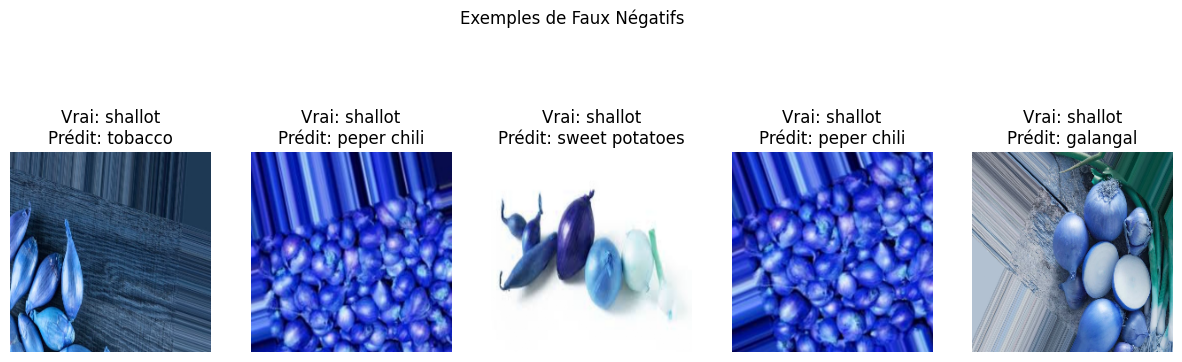

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Étape 1: Prédire les classes pour les données de test
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Étape 2: Rapport de classification
print("Rapport de classification:")
print(classification_report(true_classes, predicted_classes, target_names=train_categories))

# Étape 3: Matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualisation de la matrice de confusion
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_categories, yticklabels=train_categories)
plt.title("Matrice de confusion")
plt.xlabel("Classes Prédites")
plt.ylabel("Vraies Classes")
plt.show()

# Étape 4: Analyse des faux positifs et des faux négatifs
false_positives = np.sum((predicted_classes != true_classes) & (predicted_classes > 0))
false_negatives = np.sum((predicted_classes != true_classes) & (true_classes > 0))

print(f"Nombre total de faux positifs: {false_positives}")
print(f"Nombre total de faux négatifs: {false_negatives}")

# Identifier quelques exemples de faux positifs et négatifs
fp_indices = np.where((predicted_classes != true_classes) & (predicted_classes > 0))[0]
fn_indices = np.where((predicted_classes != true_classes) & (true_classes > 0))[0]

# Affichage d'exemples (optionnel)
def plot_examples(indices, title, num_examples=5):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices[:num_examples]):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(test_images[idx])
        plt.title(f"Vrai: {train_categories[true_classes[idx]]}\nPrédit: {train_categories[predicted_classes[idx]]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Affichage des faux positifs
plot_examples(fp_indices, "Exemples de Faux Positifs")

# Affichage des faux négatifs
plot_examples(fn_indices, "Exemples de Faux Négatifs")


Saving banana-swiss-chard-lettuce-cabbage-260nw-2351988897.webp to banana-swiss-chard-lettuce-cabbage-260nw-2351988897.webp
1/1 [==============================] - 0s 57ms/step
Image : banana-swiss-chard-lettuce-cabbage-260nw-2351988897.webp
Catégorie détectée : pineapple
Confiance : 86.83%


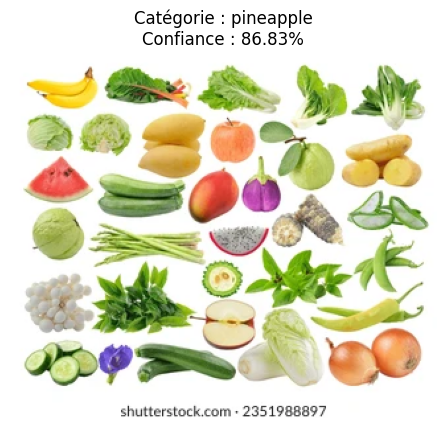

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import img_to_array

# Étape 1: Téléchargement et lecture de l'image
uploaded = files.upload()

for file_name in uploaded.keys():
    # Charger l'image
    img_path = file_name
    img = cv2.imread(img_path)

    # Vérifier si l'image est chargée correctement
    if img is None:
        print(f"Erreur lors du chargement de l'image : {file_name}")
        continue

    # Étape 2: Prétraitement de l'image
    img_resized = cv2.resize(img, (227, 227))  # Redimensionner pour AlexNet
    img_array = img_to_array(img_resized)  # Convertir en tableau NumPy
    img_array = img_array.astype('float32') / 255.0  # Normaliser
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch

    # Étape 3: Prédiction avec le modèle
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Étape 4: Affichage des résultats
    print(f"Image : {file_name}")
    print(f"Catégorie détectée : {train_categories[predicted_class]}")
    print(f"Confiance : {confidence * 100:.2f}%")

    # Afficher l'image dans Colab
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Catégorie : {train_categories[predicted_class]}\nConfiance : {confidence * 100:.2f}%")
    plt.axis('off')
    plt.show()
